# Storks Deliver Babies: A Regression Analysis

### Table of Contents
1. Part 1: Dataset 

2. Part 2: Requirements 
    - 2.1 Implementation of Two Regression Models 
    - 2.2 Comparision of Models Using Bootstraps 
    - 2.3 Discussion of Findings 

## Part 1: Dataset 
The dataset is from the following paper: **Robert Matthews**. “Storks Deliver Babies (p = 0.008)”. Teaching Statistics. Volume 22, Number 2, Summer 2000, p36-8.  

### **1.1 Population and Stork Data**

The dataset (from the paper published in 2000, but with additions) contains the following variables:

| Variable       | Description                                          |
|----------------|------------------------------------------------------|
| Country        | A small selection of countries                      |
| Area           | The land area in Km²                                 |
| Storks         | The number of stork pairs                            |
| Humans         | The population, in millions of people               |
| BirthRate      | The annual birth rate in 1000s per year             |
| GDP_per_capita | The GDP per head (in dollars)                       |
| PopDensity     | The number of people divided by area in 1000s per Km² |

## Part 2: Requirements

This task is divided into three main parts: 
- 2.1 : Implementation of Two Regression Models 
- 2.2 : Comparision of Models using Bootstraps 
- 2.3 : Discussion of Findings 

### **2.1 Implement Two Regression Models for the Number of Births**

In this section, we will develop and compare two regression models that explain the variability in the number of births. 

**Model 1**: Uses the number of storks as the sole predictor for the birth rate. 
- This model tests the hypothesis from the original paper, where a humorous yet spurious correlation was found between storks and births.

**Model 2**: Excludes the number of storks and instead uses the following as predictors:
- `Humans`: The population size (in millions). 
    - A larger population is expected to have a higher number of births.

- `GDP_per_capita`: The GDP per capita (in dollars).
    - The economic indicator of wealth, where higher prosperity is generally associated with lower birth rates due to a reduction in family size.

- `PopDensity`: Population density, derived from the `Area` and `Human`. 
    - Higher density may discourage large families due to space constraints and urban living conditions.

**Collinearity Check for Model 2 Predictors**

Before fitting the data into a regression model, we check the collinearity among the predictors in model 2, as there are more than 1 predictors in a regression model, which are `Humans`, `GDP_per_capita`, `PopDensity`. High collinearity between predictors could impact the regression model's reliability by inflating variances and making it difficult to interpret the results. 

Below, a correlation matrix is used to show pairwise correlations between predictors. High correlations (close to +1 or -1) may indicate multicollinearity. 

In [1]:
import pandas as pd

stork_df = pd.read_csv('modified_stork_data.csv')

y = stork_df['BirthRate']
X_model1 = stork_df[['Storks']]  
X_model2 = stork_df[['Humans', 'GDP_per_capita', 'PopDensity']]  

# Check for multicollinearity in model 2
correlation_matrix = X_model2.corr()
display(correlation_matrix)


,Humans,GDP_per_capita,PopDensity
Humans,1.000000,0.069863,0.020124
GDP_per_capita,0.069863,1.000000,0.493041
PopDensity,0.020124,0.493041,1.000000


**Interpretation of the Correlation Matrix** 

According to the correlation matrix, the correlation coefficient between `Humans` and `GDP_per_capita` is 0.0699, which is very close to 0. This indicates a very weak or negligible correlation between these two variables. There is no significant collinearity concern here. Next, the correlation coefficient between `Humans` and `PopDensity` is 0.0201, which is also very close to 0, indicating almost no correlation between these variables. Again, no collinearity concern. Lastly, the correlation coefficient between `GDP_per_capita` and `PopDensity` is 0.4930, which indicates a moderate positive correlation. While this is not extremely high, it suggests some level of relationship between these two variables. However, it is generally not considered a severe case of multicollinearity.

In conclusion, there are no strong evidence of collinearity detected, as the correlations between the predictors are relatively low, with the highest being 0.493 between `GDP_per_capita` and `PopDensity`. However, this does not raise an immediate red flag for severe multicollinearity.

#### **2.1.1 Fitting into Regression Models**

After confirming that there is no significant collinearity between the predictors in Model 2, we proceed with fitting the dateset into both regression models, where:
- Model 1 uses only the number of storks as a predictor for birth rates.
- Model 2 incorporates demographic and economic factors: population size, GDP per capita, and population density.

For each model, we compare the fit using appropriate visualizations and metrics. The choice of metrics, such as **R-squared (R²)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**, is crucial to understand how well each model explains the variability in birth rates. Scatter plots of predicted vs. actual birth rates and detailed explanation of these metrics is provided to ensure clarity.

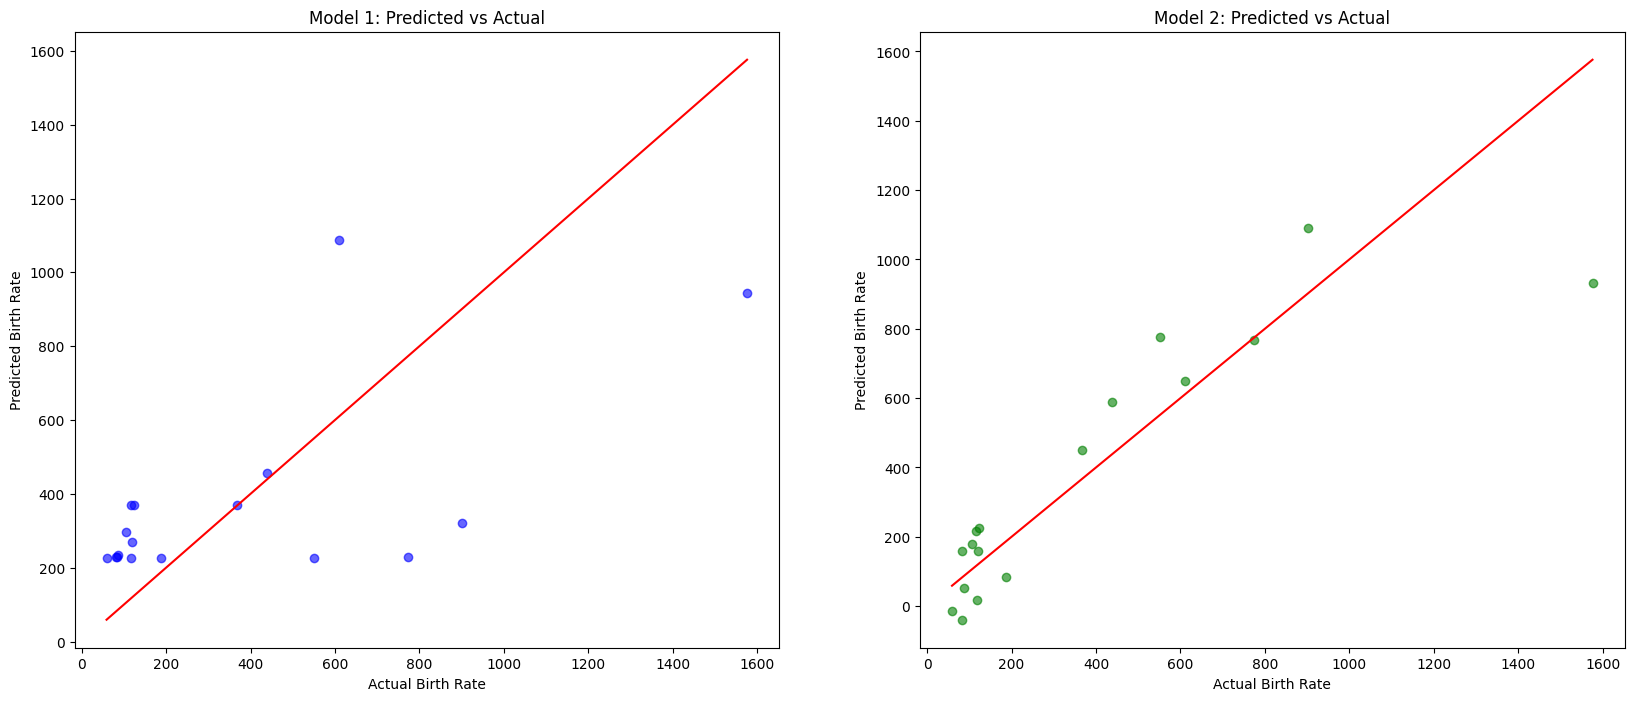

Model Performance Metrics:
Model 1: R² = 0.38 , MSE = 97365.08, RMSE = 312.03
Model 2: R² = 0.77 , MSE = 35820.65, RMSE = 189.26


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

model1 = LinearRegression().fit(X_model1, y)
model2 = LinearRegression().fit(X_model2, y)

y_pred1 = model1.predict(X_model1)
y_pred2 = model2.predict(X_model2)

# Metrics
# Model 1
r2_model1 = r2_score(y, y_pred1)
mse_model1 = mean_squared_error(y, y_pred1)
rmse_model1 = np.sqrt(mse_model1)


# Model 2 
r2_model2 = r2_score(y, y_pred2)
mse_model2 = mean_squared_error(y, y_pred2)
rmse_model2 = np.sqrt(mse_model2)

plt.figure(figsize=(20, 8))

# Model 1 
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred1, alpha=0.6, color='blue')  
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  
plt.title('Model 1: Predicted vs Actual')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')

# Model 2 
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred2, alpha=0.6, color='green')  
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  
plt.title('Model 2: Predicted vs Actual')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')

plt.show()

print('Model Performance Metrics:')
print(f'Model 1: R² = {r2_model1:.2f} , MSE = {mse_model1:.2f}, RMSE = {rmse_model1:.2f}')
print(f'Model 2: R² = {r2_model2:.2f} , MSE = {mse_model2:.2f}, RMSE = {rmse_model2:.2f}')


#### **2.1.2 Analysis of Graphs and Regression Model Performance**

This section is to show the undestanding of how well each model captures the variability in birth rates based on the model performance metrics chosen (R², MSE, and RMSE) and analysis of the scatter plots. 

**1. R² (Coefficient of Determination):**
- R² is the coefficient of determination that measures the proportion of the variance in the target variable (number of births) that is predictable from the predictor variable(s) in the model, giving insight into the relevance of predictors.It ranges from 0 to 1, where 0 indicates that the model explains none of the variability in the target variable, while 1 indicates perfect prediction as the model explains all the variability in the target variable. 

- Model 1 (R² = 0.38): Model 1 explains only 38% of the variability in birth rates using the number of storks as the sole predictor. This relatively low R² suggests that stork count alone is not a strong predictor of birth rates, as it leaves much of the variability unexplained.

- Model 2 (R² = 0.77): Model 2 explains 77% of the variability in birth rates using population size, GDP per capita, and population density as the predictors. This higher R² indicates a much better fit, suggesting that these factors are better predictors of birth rates and capture a more significant portion of the birth rate variability.


**2. MSE (Mean Squared Error):** 
- MSE is the average of the squared differences between the actual and predicted values. It penalised larger deviations more heavily, giving an indication of the model's prediction accuracy, but in squared units of the target variable. Hence, a lower MSE indicates better model performance.

- Model 1 (MSE = 97,365.08): The high MSE in Model 1 indicates substantial errors in its predictions, with the average squared deviation from actual birth rates being large.This is consistent with the low R², as it confirms that Model 1 is not accurate in predicting the number of birth.

- Model 2 (MSE = 35,820.65): Model 2 has a lower MSE than Model 1, indicating Model 2 makes smaller prediction errors on average compared to Model 1. The reduction in MSE further supports that Model 2 fits the data better. 

**3. RMSE (Root Mean Squared Error):**  
- RMSE is the square root of the MSE. It provides an average error in the same units as the target variable (number of births), making it easier to interpret the typical magnitude of the error. A lower RMSE indicates more accurate model predictions.

- Model 1 (RMSE = 312.03): The RMSE means that, on average, Model 1’s predictions deviate from the actual birth rates by about 312 births. This relatively large error (compared to Model 2) suggesting that Model 1 has poor prediction accuracy in the birth rates based on the number of storks. 

- Model 2 (RMSE = 189.26): The RMSE means that, on average, Model 2's predictions deviate from the actual birth rates by about 189 births. This relatively smaller error (compared to Model 1), suggesting that Model 2 makes more accurate predictions of number of births based on the three predictor variables than Model 1, predictions from Model 2 is closer to the actual birth rates than Model 1. 

**4. Conclusion:**

Model 1, using the number of storks as the predictor, has a relatively low R² value and high error metrics (MSE and RMSE), indicating poor performance and suggesting that the number of storks is not a strong predictor of birth rates, while Model 2, using population size, GDP per capita, and population density as the predictors, has a high R² value and much lower error metrics, demonstrating superior performance in explaining and predicting the variability in the number of births. Hence, the results from two models suggest that there is little or even no meaningful relationship between the number of storks and number of births as Model 1 performs poorly across prediction and accuracy. Contrastly, the three predictor variables are shown to be more strongly associated with birth rates, as supported by the better performance in predictive power and accuracy of Model 2. 



### **2.2 Comparision of the Two Models using Bootstrap**

In this section, we would apply the bootstrap technique to estimate confidence intervals for the difference in the root mean squared error (RMSE) between the two models. This approach will help determine if one model consistently outperforms the other.
 
#### **Bootstrap Technique and Steps**
1. **Bootstrap Resampling**:
   - Create a resampling function that generates multiple bootstrap samples.
   
2. **Modeling with Bootstrap Samples**:
   - Implement a function that fits both models (as defined in Part 1) on each bootstrap sample to calculate RMSE values.

3. **Comparing Model Performance**:
   - Calculate the RMSE difference between the two models for each bootstrap sample.
   - Repeat this process for a large number of bootstrap samples to create a distribution of RMSE differences.
   - Plot this distribution to visualize the differences in RMSE between the models.

4. **Confidence Interval (CI) Estimation**:
   - Based on the bootstrap distribution, we compute **two different confidence intervals** for the RMSE difference using **two alpha values (95% and 99%)** to assess if the performance difference is statistically significant.

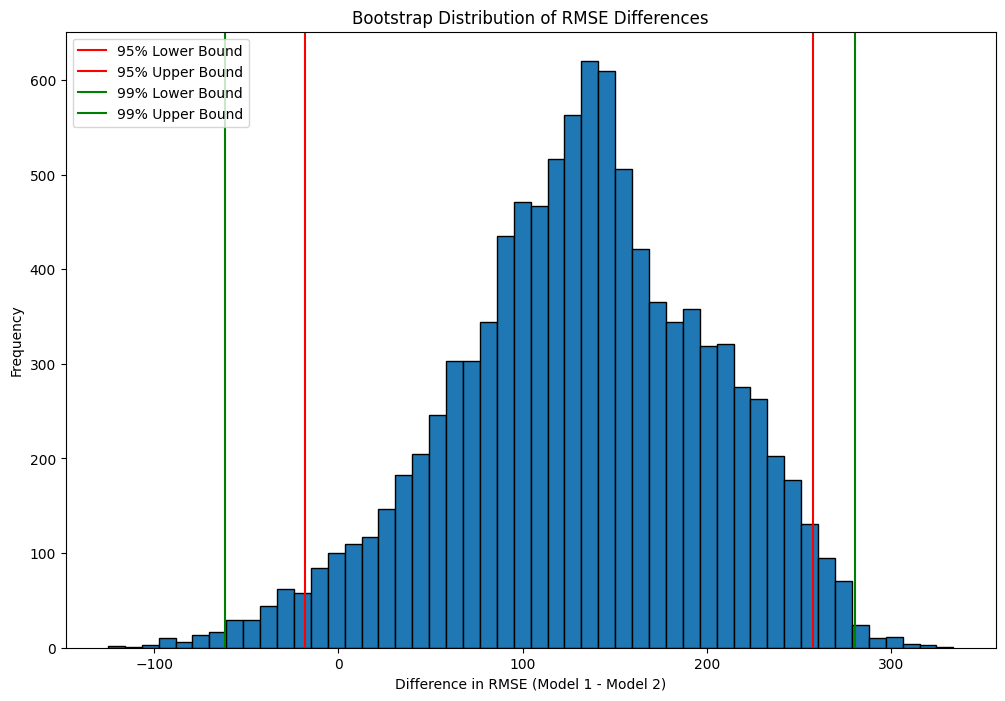

The difference in RMSE between Model 1 and Model 2 with 95% CI is -18.070 to 257.955
The difference in RMSE between Model 1 and Model 2 with 99% CI is -61.542 to 280.493


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

np.random.seed(42) #For computing the same answer for every run 

# Function for re-sampling
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data=dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(repeats):
        result.iloc[i] = func(resample(data))  
    return result

# Function to calculate the RMSE difference in resampled dataset for two models
def RMSE_diff(df):
    y = df['BirthRate']
    X_model1 = df[['Storks']]  
    X_model2 = df[['Humans', 'GDP_per_capita', 'PopDensity']]

    model1 = LinearRegression().fit(X_model1, y)
    model2 = LinearRegression().fit(X_model2, y)

    y_pred1 = model1.predict(X_model1)
    y_pred2 = model2.predict(X_model2)

    rmse_model1 = np.sqrt(mean_squared_error(y, y_pred1))
    rmse_model2 = np.sqrt(mean_squared_error(y, y_pred2))
    
    return [rmse_model1 - rmse_model2]

bstrap = bootstrapC(stork_df, ['RMSE_Difference'], 10000, RMSE_diff)

# Upper and Lower boundaries of CI
lower_95 = bstrap.RMSE_Difference.quantile(0.025)
upper_95 = bstrap.RMSE_Difference.quantile(0.975)

lower_99 = bstrap.RMSE_Difference.quantile(0.005)
upper_99 = bstrap.RMSE_Difference.quantile(0.995)


# Histogram of RMSE differences
plt.figure(figsize=(12, 8))
plt.hist(bstrap['RMSE_Difference'],edgecolor='black', bins=50)

plt.axvline(lower_95, color='red', linestyle='-', label='95% Lower Bound')
plt.axvline(upper_95, color='red', linestyle='-', label='95% Upper Bound')
plt.axvline(lower_99, color='green', linestyle='-', label='99% Lower Bound')
plt.axvline(upper_99, color='green', linestyle='-', label='99% Upper Bound')

plt.title('Bootstrap Distribution of RMSE Differences')
plt.xlabel('Difference in RMSE (Model 1 - Model 2)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('The difference in RMSE between Model 1 and Model 2 with 95%% CI is %4.3f to %4.3f' % (lower_95, upper_95))
print('The difference in RMSE between Model 1 and Model 2 with 99%% CI is %4.3f to %4.3f' % (lower_99, upper_99))


### **2.3 Discussion of Findings**

In this section, we discuss the methodology and results, providing insights into model performance and the effectiveness of the predictors used. The discussion points including: 

- **Bootstrap Principles**: Explain the bootstrap method and its purpose, including how the bootstrap distribution is used to estimate variability and confidence in model performance.
  
- **Interpretation of CI and Conclusion**: Summarize the results, indicating whether the confidence interval suggests a significant difference in fit between the two models. Discuss whether one model appears to consistently outperform the other based on RMSE differences.

- **True Causes of Differences in Birth Rate Based on Model Fit**: Analyze what the performance of the two models suggests about the true causes of differences in birth rates, specifically considering the impact of numbers of storks, population size, GDP per capita, and population density as explanatory variables.

**(a) Principles of the Bootstrap Method and the Bootstrap Distribution:** 

The Bootstrap method is a resampling technique used to assess the variability of a statistic by generating multiple new samples from the original dataset, each with replacement. In this analysis, we applied this method to compare the difference in RMSE between two models in predicting the birth rates; where Model 1 uses solely the number of storks as the predictor variable, while Model 2 uses population, GDP per capita and population density as the predictor variables. 

For each bootstrap sample, the RMSE for both models and the difference of RMSE are calculated. With these values, we could create a bootstrap distribution of RMSE differences, and hence allowing us to construct a confidence interval for the RMSE difference. The 95% and 99% confidence intervals for the RMSE difference provide a range within which the true RMSE difference is likely to lie, allowing us to quantify our confidence in the results. Hence, we could understand the reliability and significance of the difference between two models' performance. 

**(b) Interpretation of the Confidence Interval and Conclusion**

Based on the bootstrap analysis, we calculated the 95% and 99% confidence intervals for the difference in RMSE between Model 1 (storks predictor) and Model 2 (demographic and economic predictors). The 95% confidence interval includes zero, suggesting that the difference in RMSE between Model 1 and Model 2 is not statistically significant at the 5% level. This means that, with 95% confidence, we cannot conclusively say that Model 2 consistently outperforms Model 1. Although the upper bound is positive (257.955), indicating that Model 2 generally has a lower RMSE, and hence has a better fit and performs better than Model 1. However, the negative lower bound (-18.070) means that in some occasional cases, Model 1 has a better fit than Model 2. The 95% confidence level includes zero, suggesting that there is a possibility that the difference in performance is not significant.

The 99% confidence interval is even wider, ranging from -61.542 to 280.493, and it also includes zero. This further confirms that the difference in RMSE between the two models is not statistically significant at the 1% level. With a 99% confidence level, we must be even more cautious in asserting any performance difference, as this interval suggests an even greater overlap in possible RMSE values for the two models.

**Conclusion**

As we move to higher confidence levels (95% and 99%), the confidence intervals become wider and continue to include zero. This indicates that we do not have enough evidence to confidently claim that Model 2 fits better than Model 1 at these higher confidence levels.

While Model 2 generally performs better (lower RMSE and RMSE distribution slighlty skewed to the left), the results are not statistically robust at the 95% and 99% confidence levels. Thus, we cannot definitively conclude that Model 2 consistently outperforms Model 1 based on the RMSE difference.



**(c) What the Fit of the Two Models Tells Us About the True Causes of Differences in Birth Rates?**

Model 1, which uses only the number of storks as a predictor, performed poorly in terms of RMSE and R² compared to Model 2. This weak performance implies that the number of storks has minimal relevance as an explanatory factor for birth rates.
The association between storks and birth rates is likely a spurious correlation—a relationship that appears statistically significant but lacks causal meaning. This aligns with the concept that storks do not directly impact human birth rates, and the observed correlation may be due to coincidental factors.

In contrast, the better fit of Model 2 (higher R² and lower RMSE) indicates that demographic and economic factors are more meaningful predictors of birth rates than number of storks, as population size, GDP per capita, and population density are more likely to be related to birth rate variability, reflecting more true and realistic relationships rather than a spurious correlation as seen in Model 1. For example, a larger population size correlates with a higher number of births, as a greater number of people naturally results in more births. This is a straightforward and meaningful predictor. In many cases, higher GDP per capita is associated with lower birth rates due to factors like increased access to education, career opportunities, and family planning resources. This variable suggests that economic prosperity may discourage larger family sizes. Lastly, high population density can influence birth rates by affecting living conditions, cost of living, and available space. In crowded areas, people may choose to have fewer children due to limited resources and higher living costs.

In conclusion, the results showed that demographic and economic variables are better in explaining the variability of birth rates rather than spurious correlations, suggesting that further studies aimed at understanding birth rates should focus on these factors.